2.0804462232332277 2.213240663014072


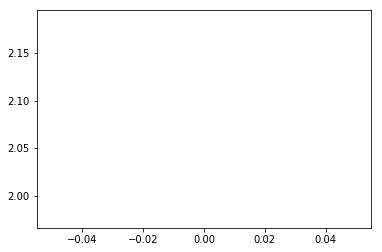

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
def IdealSoliton(K) -> list: 
    """ Generate a list of probalities of length K, following ideal soliton distribution
    INPUT:
        K: length of list
    OUTPUT:
        probabilities: list of probabilities following ideal soliton distribution
    """
    # initialize with the first two values, p(0) = 0 and p(1) = 1/K
    probabilities = [0, 1/K]
    # calculate the rest of the values using p(i) = 1/(i*(i-1))
    probabilities += [1/(i*(i-1)) for i in range(2, K+1)]
    return probabilities 

def RobustSoliton(K,c,delta, get_redundancy=False) -> list:
    """ Generates a list of probalities of length K, following an robust soliton distribution with variables c and delta.
    INPUT:
        K: length of list
        c: value of c variable in distribution
        delta: value of delta variable in distribution
    OUTPUT: either of the two
        probabilities: list of probabilities following robust soliton distribution
        Z: the factor of amount of droplets needed to decode this with a certainty delta 
    """
    #initialize with the ideal distribution
    probabilities = IdealSoliton(K)
    # Define R
    R = c*(math.log(K/delta)**2)*math.sqrt(K)
    # calculate the additional probabilities
    pivot = int(math.floor(K/R))
    robust_probabilities = [0] + [R/(i*K) for i in range(1, pivot)]
    robust_probabilities += [(R*math.log(R/delta))/K]
    robust_probabilities += [0 for i in range(pivot,K)]
    # add together
    probabilities = np.add(robust_probabilities, probabilities)
    #normalize 
    Z=np.sum(probabilities)
    probabilities /= np.sum(probabilities)
    if get_redundancy:
        return Z
    else:
        return probabilities

Z=RobustSoliton(10000, 0.025, 0.001, True)
plt.plot(Z)
print(Z, Z/0.94)
